In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

'''  
risk parity allocation
'''


'  \nrisk parity allocation\n'

In [2]:
# read in data 
data = pd.read_csv('case2data.csv', index_col = 0)
train, test = train_test_split(data, test_size = 0.2, shuffle = False)

In [3]:
def func(x, cov):
    return np.dot(np.dot(x, cov), x)

def rescale(input):
    #make sum to 1 and each value within range
    #temp = input / np.sum(input)
    #temp[temp > 1] = 1
    #temp[temp < -1] = 0
    
    # softmax
    temp = np.exp(input) / np.sum(np.exp(input))
    
    return temp

In [ ]:
def risk(weightts, cov):
    
    '''
    
    '''

In [4]:
# uniform weights
def calculateWeights(running_price_paths, running_weights_paths):
    cov1 = np.cov(running_price_paths[-21:].T)
    w = running_weights_paths[len(running_weights_paths) - 1]
    
    weights = minimize(func, w, cov1)
    ret = weights.x / (np.sum(weights.x))

    return rescale(ret)

In [5]:
## given grading scheme
class Allocator():
    def __init__(self, train_data):
        '''
        Anything data you want to store between days must be stored in a class field
        '''
        self.running_price_paths = train_data.copy()
        self.train_data = train_data.copy()
        self.running_weights_paths = [[1/6, 1/6, 1/6, 1/6, 1/6, 1/6]]
        
        # Do any preprocessing here -- do not touch running_price_paths, it will store the price path up to that data
        
        
    def allocate_portfolio(self, asset_prices):
        '''
        asset_prices: np array of length 6, prices of the 6 assets on a particular day
        weights: np array of length 6, portfolio allocation for the next day
        '''
        ### edit: used np.append to make this work
        self.running_price_paths.loc[len(self.running_price_paths.index)] = asset_prices
        #self.running_price_paths. = np.append(self.running_price_paths, asset_prices)
        #print(self.running_price_paths)
    
        ### TODO Implement your code here
        weights = calculateWeights(self.running_price_paths, self.running_weights_paths)
        self.running_weights_paths.append(weights)
        
        return weights
    
    
def grading(train_data, test_data): 
    '''
    Grading Script
    '''
    weights = np.full(shape=(len(test_data.index),6), fill_value=0.0)
    alloc = Allocator(train_data)
    for i in range(0,len(test_data)):
        weights[i,:] = alloc.allocate_portfolio(test_data.iloc[i,:])
        if np.sum(weights < -1) or np.sum(weights > 1):
            raise Exception("Weights Outside of Bounds")
    
    capital = [1]
    for i in range(len(test_data) - 1):
        shares = capital[-1] * weights[i] / np.array(test_data.iloc[i,:])
        balance = capital[-1] - np.dot(shares, np.array(test_data.iloc[i,:]))
        net_change = np.dot(shares, np.array(test_data.iloc[i+1,:]))
        capital.append(balance + net_change)
    capital = np.array(capital)
    returns = (capital[1:] - capital[:-1]) / capital[:-1]
    
    if np.std(returns) != 0:
        sharpe = np.mean(returns) / np.std(returns)
    else:
        sharpe = 0
        
    return sharpe, capital, weights

[0.1295015  0.31531857 0.1501797  0.13967179 0.11744807 0.14788037]
[0.12089241 0.33236167 0.14498964 0.14658545 0.11190524 0.14326559]
[0.13478356 0.31864917 0.13458601 0.13887975 0.15897755 0.11412395]
[0.1233084  0.19506888 0.08675101 0.30138257 0.20240214 0.091087  ]
[0.12873174 0.34300131 0.13995369 0.12797558 0.1313382  0.12899948]
[0.12799864 0.3371553  0.13980574 0.13167167 0.13663379 0.12673487]
[0.13683791 0.32383641 0.14595973 0.11880883 0.12313717 0.15141995]
[0.12160805 0.34587668 0.13171901 0.14603878 0.14863603 0.10612146]
[0.11915361 0.32558411 0.14458357 0.15936319 0.12535821 0.1259573 ]
[0.12598584 0.23172945 0.13695508 0.18930629 0.21485483 0.10116851]
[0.14111428 0.28628674 0.13539633 0.13219679 0.1982587  0.10674716]
[0.18818051 0.17739162 0.14583206 0.12470155 0.19452845 0.16936582]
[0.2150066  0.10449415 0.13948062 0.11495501 0.22431369 0.20174992]
[3.88372675e-10 9.99998867e-01 1.02623911e-07 1.02936169e-06
 2.52834124e-10 1.32840766e-10]
[0.06109733 0.62287875 

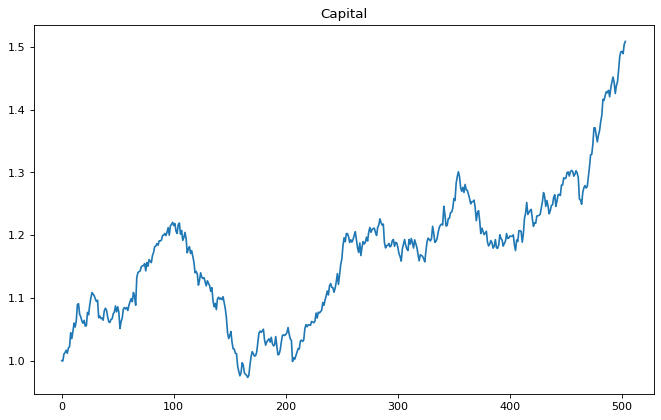

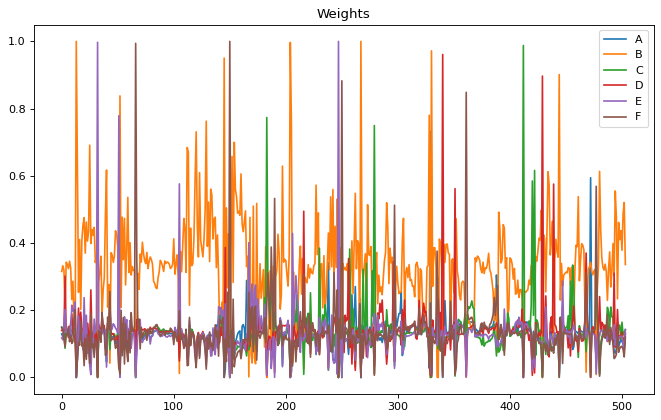

'\n10 days: 1.4\none month: 1.5\none year: 1.25\ntotal: 1.30\n'

In [6]:
# run simulation
sharpe, capital, weights = grading(train, test)
print(sharpe)

plt.figure(figsize=(10, 6), dpi=80)
plt.title("Capital")
plt.plot(np.arange(len(test)), capital)
plt.show()

plt.figure(figsize=(10, 6), dpi=80)
plt.title("Weights")
plt.plot(np.arange(len(test)), weights)
plt.legend(test.columns)
plt.show()


'''
10 days: 1.4
one month: 1.5
one year: 1.25
total: 1.30
'''